<a href="https://colab.research.google.com/github/konerjonlar/Akbank-Makine-Ogrenmesi-Bootcamp/blob/main/UK-%20EmpowerHER-%20Ideathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: df = pd.read_csv(file_path)  Dataset_FireWatch_Brazil_Q1_2024.csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'Year-on-year change in CO emissions.csv'
df = pd.read_csv(file_path)


In [ ]:
sampled_df = df.sample(frac=0.1)  # Sample 10% of the data


# Print some info to make sure the sample was made properly
df.head()
df.info()
df.describe()
print(f"Original data shape: {df.shape}")
print(f"Sampled data shape: {sampled_df.shape}")
print(df.columns)
print("İlk 5 Satır:")
print(df.head())
print("\nVeri Bilgisi:")
print(df.info())
print("\nTemel İstatistikler:")
print(df.describe())



# You can further filter this sampled data for exploration



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26981 entries, 0 to 26980
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  26981 non-null  object 
 1   Code                    23175 non-null  object 
 2   Year                    26981 non-null  int64  
 3   growth_emissions_total  26981 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 843.3+ KB
Original data shape: (26981, 4)
Sampled data shape: (2698, 4)
Index(['Entity', 'Code', 'Year', 'growth_emissions_total'], dtype='object')
İlk 5 Satır:
        Entity Code  Year  growth_emissions_total
0  Afghanistan  AFG  1950                 69616.0
1  Afghanistan  AFG  1951                  7328.0
2  Afghanistan  AFG  1952                     0.0
3  Afghanistan  AFG  1953                 14656.0
4  Afghanistan  AFG  1954                     0.0

Veri Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeI

In [ ]:
print("İlk 5 Satır:")
print(df.head())
print("\nVeri Bilgisi:")
print(df.info())
print("\nTemel İstatistikler:")
print(df.describe())

İlk 5 Satır:
         data                 municipio    estado     bioma  \
0  2024-01-01             VALE DO ANARI  RONDÔNIA  Amazônia   
1  2024-01-01  SÃO GABRIEL DA CACHOEIRA  AMAZONAS  Amazônia   
2  2024-01-01                 MANAQUIRI  AMAZONAS  Amazônia   
3  2024-01-01                     JUTAÍ  AMAZONAS  Amazônia   
4  2024-01-01                   AUTAZES  AMAZONAS  Amazônia   

   avg_numero_dias_sem_chuva  avg_precipitacao  avg_risco_fogo  avg_frp  
0                        0.0           1698.00             0.0    13.00  
1                        0.2            206.80             0.0    81.40  
2                        0.0             60.00             0.0    27.00  
3                        2.0            776.00             0.0   211.00  
4                        0.0              2.22             0.0    97.67  

Veri Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43753 entries, 0 to 43752
Data columns (total 8 columns):
 #   Column                     Non-Null 

In [ ]:
df['growth_emissions_total'] = df['growth_emissions_total'].fillna(0)


<ipython-input-42-3fb640d7c0b7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entity', y='growth_emissions_total', data=entity_emissions, palette='OrRd')


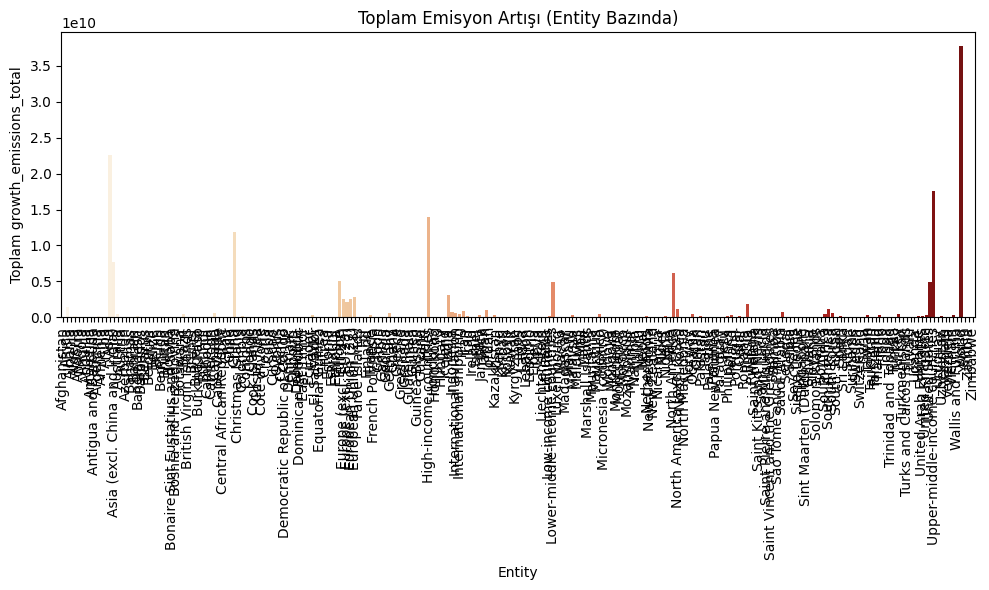

In [42]:
# Entity bazında toplam growth_emissions_total değerlerini hesapla
if 'Entity' in df.columns and 'growth_emissions_total' in df.columns:
    entity_emissions = df.groupby('Entity')['growth_emissions_total'].sum().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Entity', y='growth_emissions_total', data=entity_emissions, palette='OrRd')
    plt.title('Toplam Emisyon Artışı (Entity Bazında)')
    plt.xlabel('  ')
    plt.ylabel('Toplam growth_emissions_total')
    plt.xticks(rotation=90)  # Uzun isimler için döndürme
    plt.tight_layout()
    plt.show()
else:
    print("HATA: 'Entity' veya 'growth_emissions_total' sütunu veri setinde bulunamadı!")


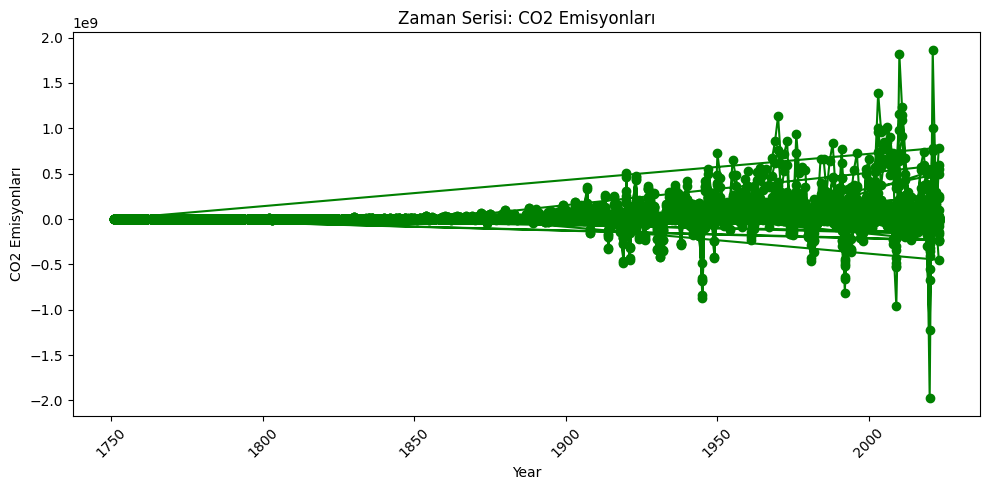

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['growth_emissions_total'], marker='o', linestyle='-', color='green')
plt.title('Zaman Serisi: CO2 Emisyonları')
plt.xlabel('Year')
plt.ylabel('CO2 Emisyonları')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



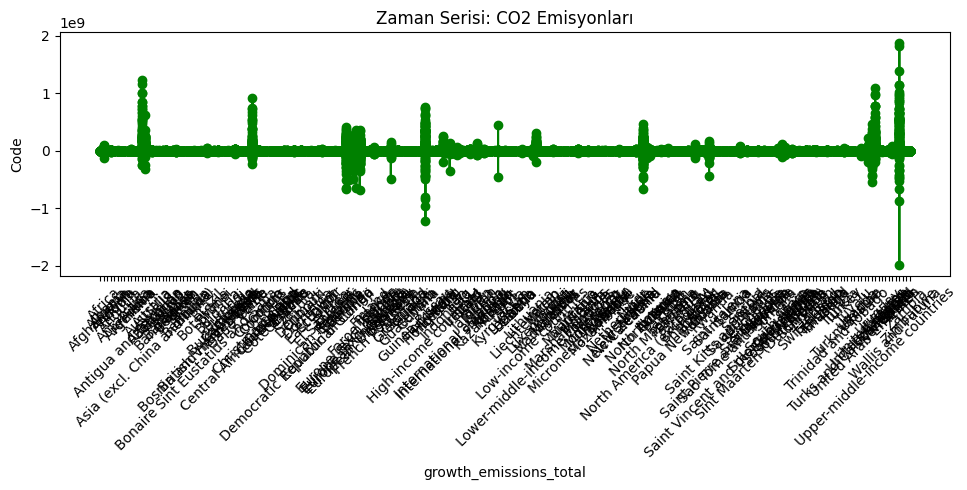

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(df['Entity'], df['growth_emissions_total'], marker='o', linestyle='-', color='green')
plt.title('Zaman Serisi: CO2 Emisyonları')
plt.xlabel('growth_emissions_total')
plt.ylabel('Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



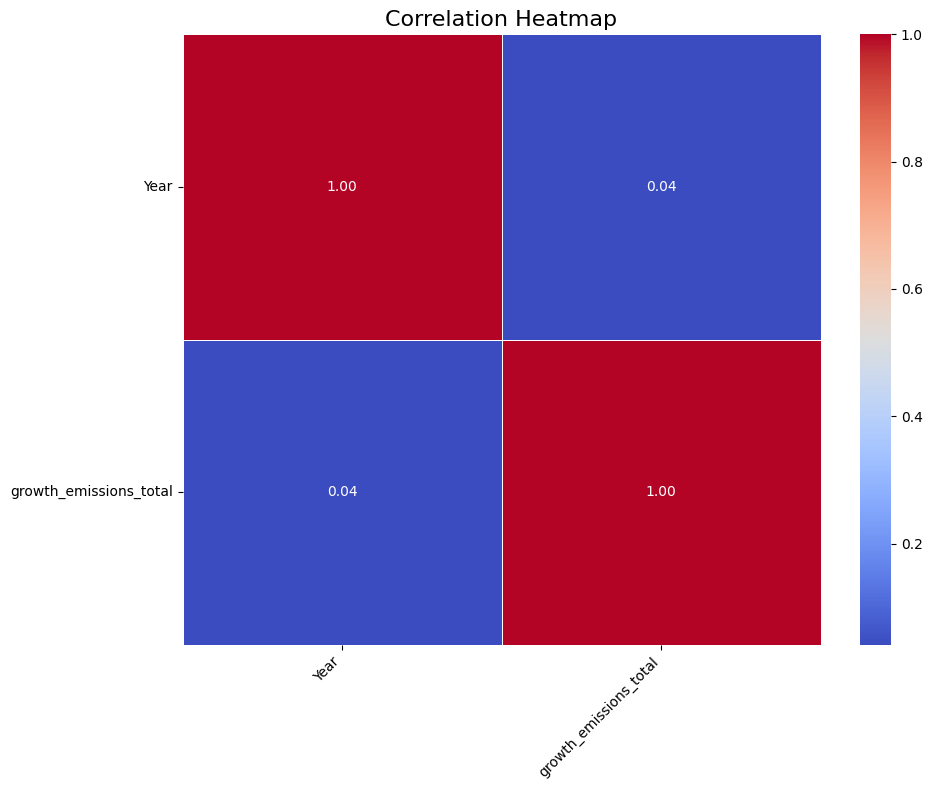

In [53]:
# Eğer sayısal sütunlarınız varsa, bu sütunlar arasındaki korelasyonu görselleştirebilirsiniz.
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))  # Biraz daha büyük bir figür boyutu
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap', fontsize=16)  # Başlık boyutunu artır
    plt.xticks(rotation=45, ha='right')  # X eksenindeki etiketleri döndür
    plt.yticks(rotation=0)  # Y eksenindeki etiketleri döndürme
    plt.tight_layout()
    plt.show()